# Training the Karbi Number Detection model

In [4]:
import os 
train_dir = '/train'  # Provide the location of the Train data
test_dir = '/test'   # Provide the location of the test data

zero_dir = os.path.join(train_dir, '0')
one_dir = os.path.join(train_dir, '1')
two_dir = os.path.join(train_dir, '2')
three_dir = os.path.join(train_dir, '3')
four_dir = os.path.join(train_dir, '4')
five_dir = os.path.join(train_dir, '5')
six_dir = os.path.join(train_dir, '6')
seven_dir = os.path.join(train_dir, '7')
eight_dir = os.path.join(train_dir, '8')
nine_dir = os.path.join(train_dir, '9')

print("No of zero are: " + str(len(os.listdir(zero_dir))))
print("No of one are: " + str(len(os.listdir(one_dir))))
print("No of two are: " + str(len(os.listdir(two_dir))))

# total train image = 2440   (61 x 3) x 10   Three times copied the images to get more images for training
# total test image = 610    ( 61 x 10 )


No of zero are: 244
No of one are: 244
No of two are: 244


In [15]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
                                    layers.Conv2D(64,(3,3),activation='relu', input_shape=(150,150,3)),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(64,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Conv2D(128,(3,3),activation='relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Flatten(),
                                    layers.Dropout(0.5),
                                    layers.Dense(1024,activation='relu'),
                                    layers.Dense(10,activation='softmax')  # softmax is one of the best activation for multiclassification
])

model.compile(
    loss = 'categorical_crossentropy',  # categorical crossentropy is a loss used in multi class classification model
    optimizer='rmsprop',   
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

train_datagen = ImageDataGenerator(rescale=1/255)   # rescaling all images to same size
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=122,
    target_size=(150,150),
    class_mode='categorical'     
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=150,
    target_size=(150,150),
    class_mode='categorical'   
)

Found 2440 images belonging to 10 classes.
Found 610 images belonging to 10 classes.


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,   # steps_per_epochs = total train data/ batch size = 2440/122 = 20
    epochs=15,
    validation_data = validation_generator,
    validation_steps=4,   
    verbose=1
)

Epoch 1/15
20/20 [==============================] - 188s 9s/step - loss: 0.1612 - accuracy: 0.9570 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 2/15
20/20 [==============================] - 187s 9s/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 5.7606e-04 - val_accuracy: 1.0000
Epoch 3/15
20/20 [==============================] - 188s 9s/step - loss: 0.0965 - accuracy: 0.9680 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/15
20/20 [==============================] - 193s 10s/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0567 - val_accuracy: 0.9820
Epoch 5/15
20/20 [==============================] - 187s 9s/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.0096 - val_accuracy: 0.9951
Epoch 6/15
20/20 [==============================] - 186s 9s/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 3.3162e-04 - val_accuracy: 1.0000
Epoch 7/15
20/20 [==============================] - 188s 9s/step - loss: 0.0903 - accuracy: 0.9779 - val_loss: 0.0093 - val_accuracy: 0.9984
Epoc

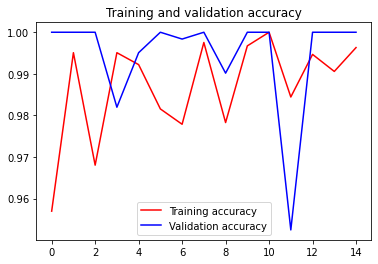

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Saving the model to .h5

In [ ]:
model.save("karbiClass.h5")

### Now go to the GUI_Detection.ipynb file for graphical detection

In [ ]:
# THIS BELOW CODE WORKS IN GOOGLE COLAB  

# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(150, 150))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)  # classes is a 2d array in format [[0 1 0]] or like tht
#   print(fn)
#   print(classes)
#   if classes[0][0] == 1:
#     print(fn + " is zero")
#   elif classes[0][1] == 1:
#     print(fn + " is one")
#   elif classes[0][2] == 1:
#     print(fn + " is two")
#   elif classes[0][3] == 1:
#     print(fn + " is three")
#   elif classes[0][4] == 1:
#     print(fn + " is four")
#   elif classes[0][5] == 1:
#     print(fn + " is five")
#   elif classes[0][6] == 1:
#     print(fn + " is six")
#   elif classes[0][7] == 1:
#     print(fn + " is seven")
#   elif classes[0][8] == 1:
#     print(fn + " is eight")
#   elif classes[0][9] == 1:
#     print(fn + " is nine")